In [8]:
import pandas as pd
from IPython.display import Image
from IPython.display import display
import numpy as np
from scipy import stats
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

In [9]:
cands = pd.read_csv("../output/list_of_candidates_final.csv", sep=',')
emotions = pd.read_csv("../output/predicted_emotions.csv", sep=',')

In [10]:
merged_simplified = emotions
merged_simplified = merged_simplified.groupby(['uidname','emotions']).size().reset_index(name='counts')
merged_simplified = merged_simplified.pivot(index='uidname', columns='emotions', values='counts')
merged_simplified = merged_simplified.fillna(0)
merged_simplified['total'] = 0
for cols in range(1,len(merged_simplified.columns)):
    merged_simplified['total'] = merged_simplified['total'] + merged_simplified[cols]
for cols in range(1,len(merged_simplified.columns)):
    merged_simplified[cols] = merged_simplified[cols]/merged_simplified['total']
merged_simplified = cands.join(merged_simplified, on='uidname', how='left')
merged_simplified['rank_votes']= merged_simplified.groupby(['country_name_short'])['vote_share'].rank()
merged_simplified

,Unnamed: 0,Unnamed: 0.1,country_name_short,country_name,election_type,election_date,vote_share,seats,seats_total,party_name_short,...,leader,searchterm,uidname,female,1,2,3,4,total,rank_votes
0,0,0,AUS,Australia,parliament,2016-07-02,34.73,69.0,150,ALP,...,Bill Shorten,NaN,bill_shorten,0,0.434109,0.085271,0.441860,0.038760,129.0,4.0
1,1,1,AUS,Australia,parliament,2016-07-02,28.67,45.0,150,LPA,...,Malcolm Turnbull,Liberal Party of Australia,malcolm_turnbull,0,0.241379,0.089655,0.572414,0.096552,145.0,3.0
2,2,2,AUS,Australia,parliament,2016-07-02,8.52,21.0,150,LNPQ,...,Deb Frecklington,Liberal National Party of Queensland,deb_frecklington,1,0.305195,0.175325,0.279221,0.240260,154.0,1.0
3,3,5,AUS,Australia,parliament,2016-07-02,10.23,1.0,150,AG,...,Richard Di Natale,Australian Greens,richard_di_natale,0,0.303030,0.060606,0.507576,0.128788,132.0,2.0
4,4,11,AUT,Austria,parliament,2017-10-15,31.50,62.0,183,OVP,...,Sebastian Kurz,Austrian People's Party,sebastian_kurz,0,0.401235,0.117284,0.345679,0.135802,162.0,4.0
5,5,12,AUT,Austria,parliament,2017-10-15,26.90,52.0,183,SPO,...,Christian Kern,Social Democratic Party of Austria,christian_kern,0,0.390476,0.076190,0.342857,0.190476,105.0,3.0
6,6,13,AUT,Austria,parliament,2017-10-15,26.00,51.0,183,FPO,...,Heinz-Christian Strache,Freedom Party of Austria,heinz_christian_strache,0,0.352113,0.077465,0.401408,0.169014,142.0,2.0
7,7,14,AUT,Austria,parliament,2017-10-15,5.30,10.0,183,NEOS,...,Beate Meinl-Reisinger,NEOS – The New Austria and Liberal Forum,beate_meinl_reisinger,1,0.150794,0.134921,0.388889,0.325397,126.0,1.0
8,8,18,BGR,Bulgaria,parliament,2017-03-26,33.54,95.0,240,GERB,...,Boyko Borisov,GERB,boyko_borisov,0,0.240000,0.144000,0.544000,0.072000,125.0,4.0
9,9,19,BGR,Bulgaria,parliament,2017-03-26,27.93,80.0,240,KzB|DL,...,Korneliya Ninova,Coalition for Bulgaria,korneliya_ninova,1,0.303922,0.127451,0.382353,0.186275,102.0,3.0


# Test photos and emotions

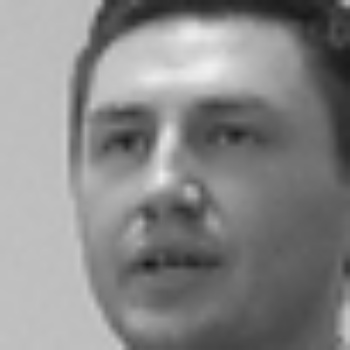

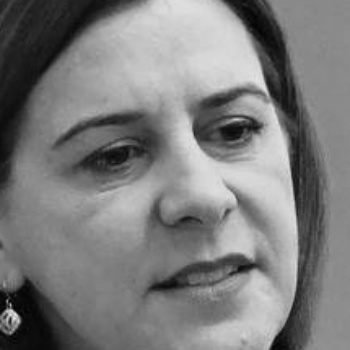

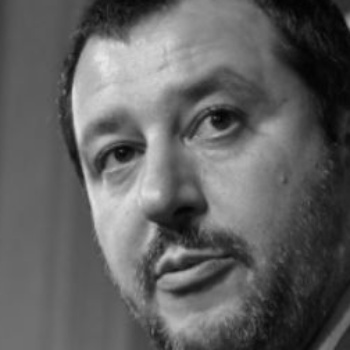

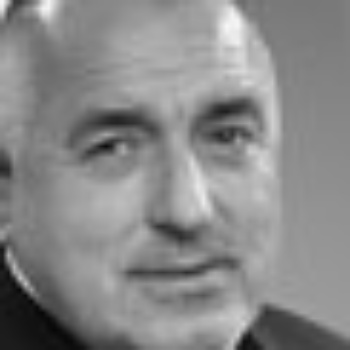

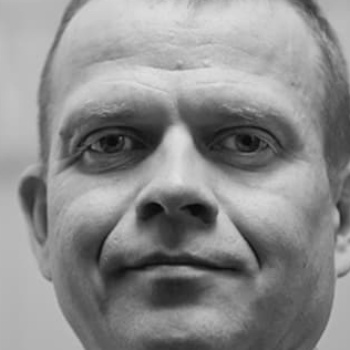

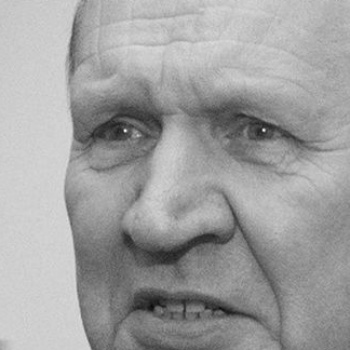

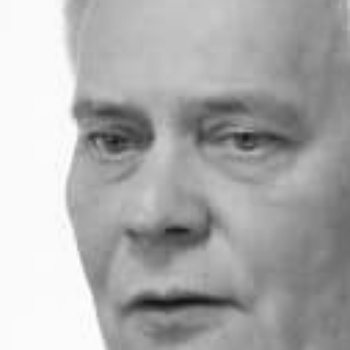

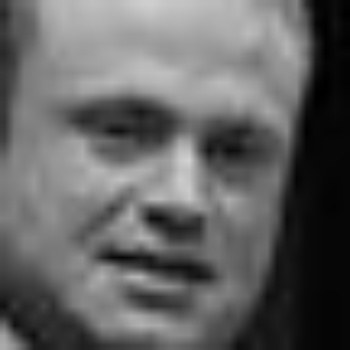

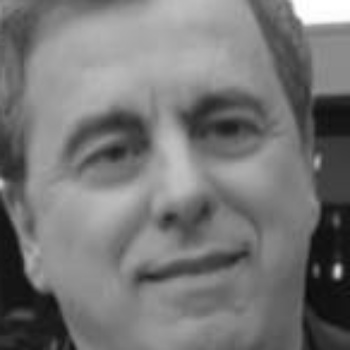

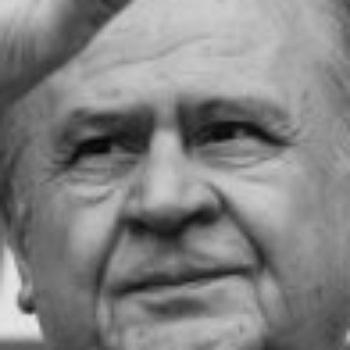

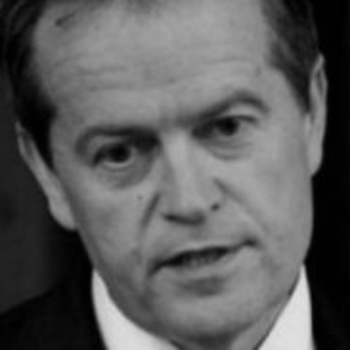

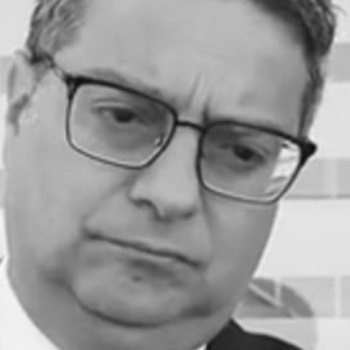

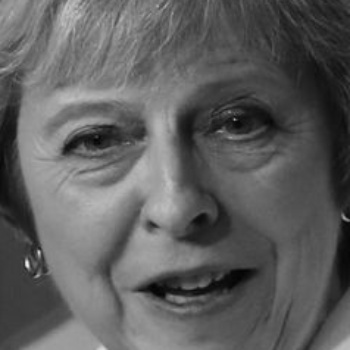

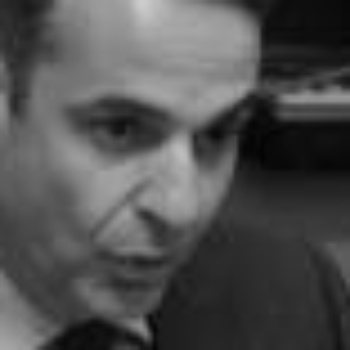

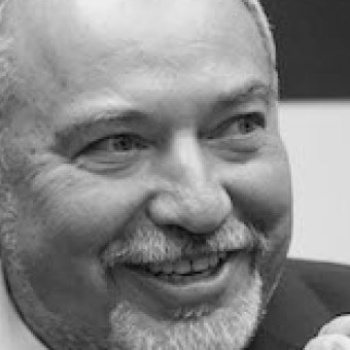

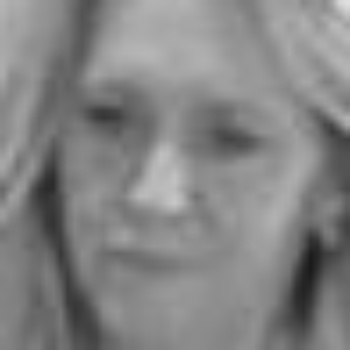

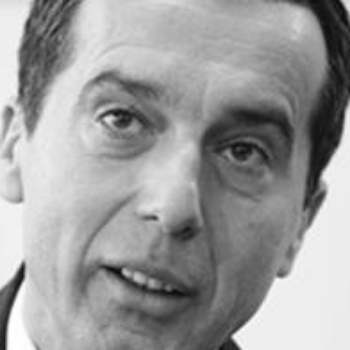

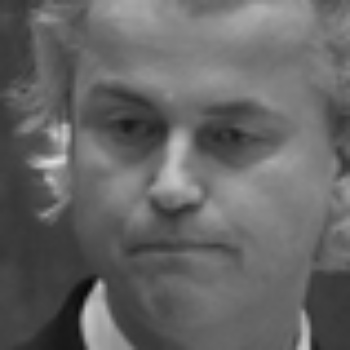

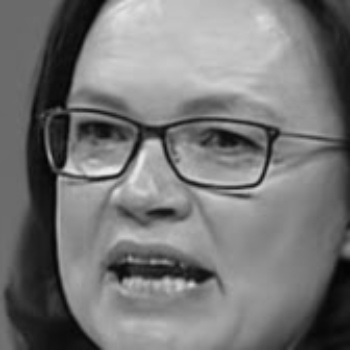

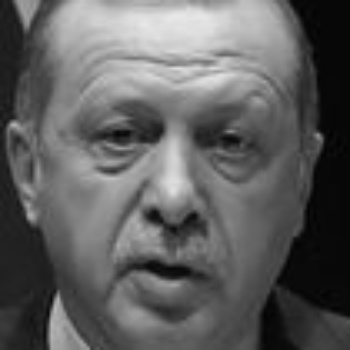

In [47]:
chosen_emotion = 1
size_of_sample = 20
images_with_emotion = emotions.loc[(emotions.emotions == chosen_emotion), ['paths']]
images_with_emotion = images_with_emotion.sample(n=size_of_sample)
for image in images_with_emotion['paths']:
    display(Image(filename = image))

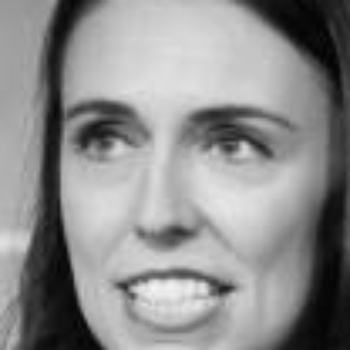

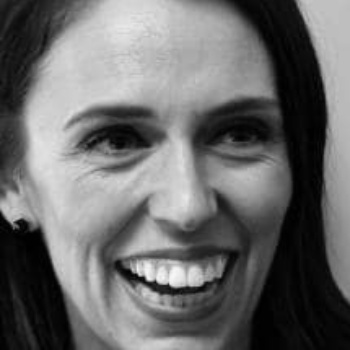

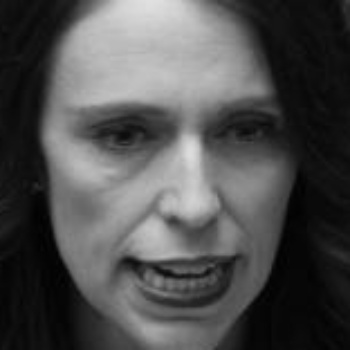

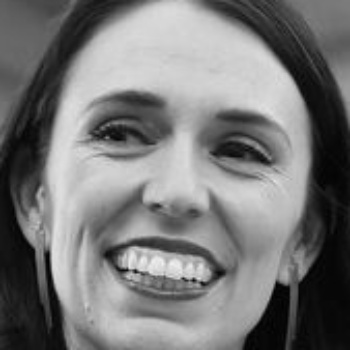

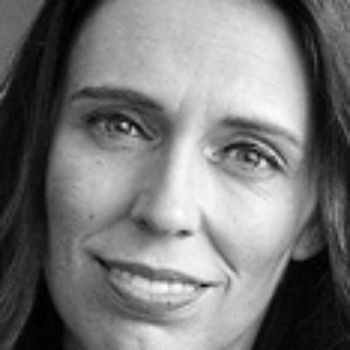

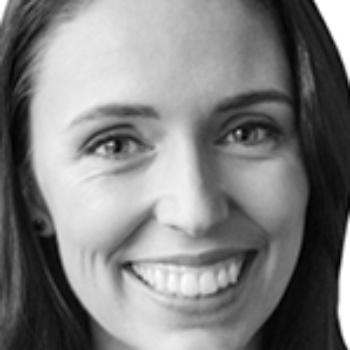

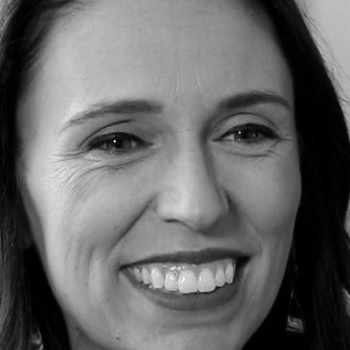

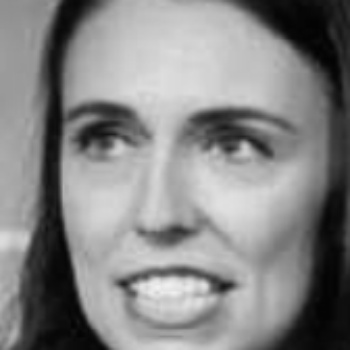

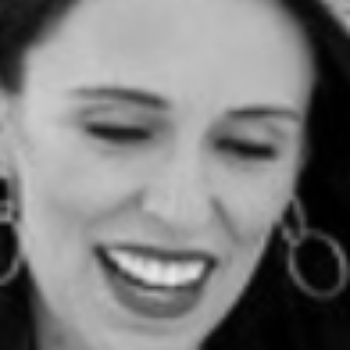

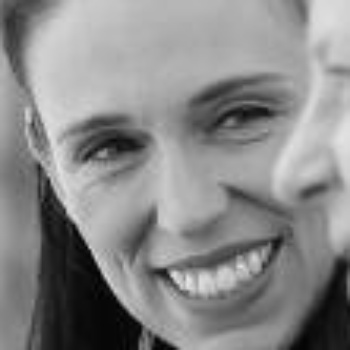

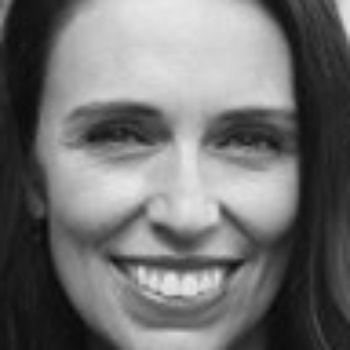

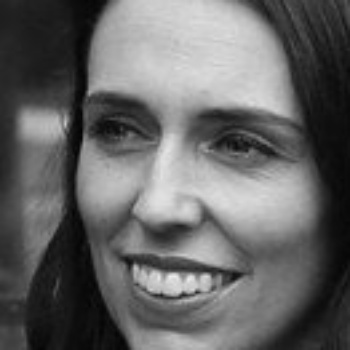

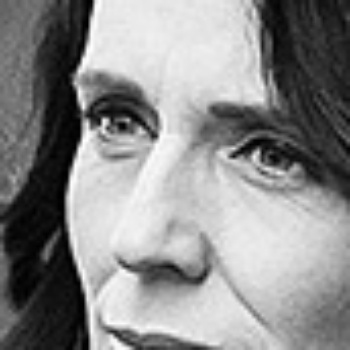

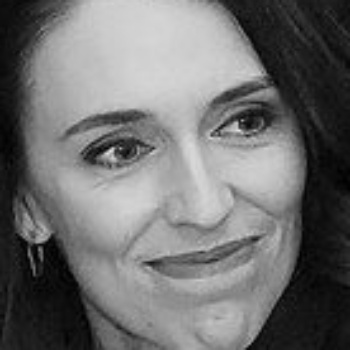

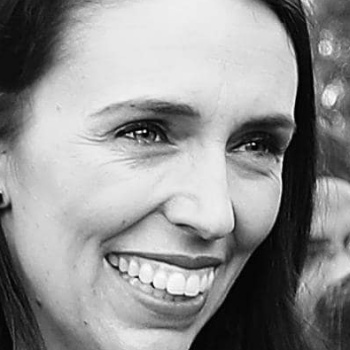

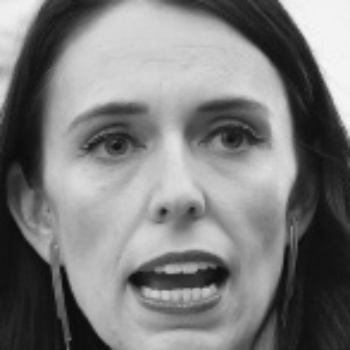

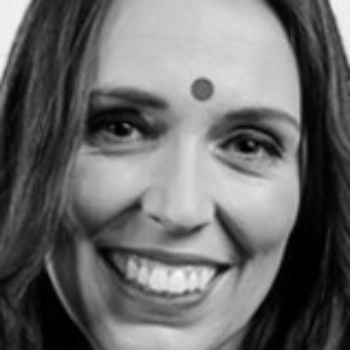

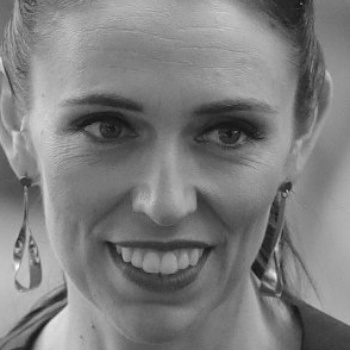

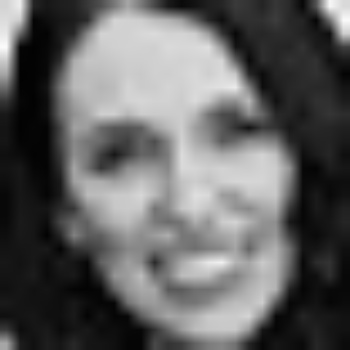

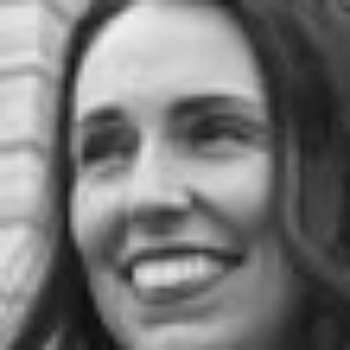

In [63]:
chosen_person = 'jacinda_ardern'
size_of_sample = 20
images_with_emotion = emotions.loc[(emotions.uidname == chosen_person), ['paths']]
images_with_emotion = images_with_emotion.sample(n=size_of_sample)
for image in images_with_emotion['paths']:
    display(Image(filename = image))

# Summary by country

In [11]:
chosen_country='France'
df=merged_simplified[(merged_simplified.country_name == chosen_country)]
data = [
        go.Bar(
        x=df['leader'],
        y=df[1],
        name='angry'
        
    ),
    go.Bar(
        x=df['leader'],
        y=df[2],
        name='sad'
        
    ),
    go.Bar(
        x=df['leader'],
        y=df[3],
        name='neutral'
    ),
    go.Bar(
        x=df['leader'],
        y=df[4],
        name='positive'
    )

]

layout = go.Layout(
    barmode='stack',
    title=chosen_country
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Scatter plot left-right axis and emotions

In [22]:
emotion_number=3
mask = ~np.isnan(merged_simplified['left_right']) & ~np.isnan(merged_simplified[emotion_number])
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_simplified['left_right'][mask], 
                                                               merged_simplified[emotion_number][mask])
line = slope*merged_simplified['left_right']+intercept

# Creating the dataset, and generating the plot
trace1 = go.Scatter(
            x = merged_simplified['left_right'],
            y = merged_simplified[emotion_number],
            mode = 'markers'
            )

trace2 = go.Scatter(
              x=merged_simplified['left_right'],
              y=line,
              mode='lines'
             )

data = [trace1, trace2]
fig = go.Figure(data=data)

iplot(fig)

In [13]:
df = merged_simplified
df['rounded_left_right']=df['left_right']/2
df=df.round({'rounded_left_right':0})
df = df[[1,2,3,4,'total', 'rounded_left_right']]
wm = lambda x: np.average(x, weights=df.loc[x.index, 'total'])
f = {'total': ['sum'], 1: {1 : wm}, 2: {2 : wm} , 3: {3 : wm}, 4: {4: wm}}
df = df.groupby(['rounded_left_right']).agg(f)
df = df.reset_index()

data = [
        go.Bar(
        x=df[('rounded_left_right', '')],
        y=df[(1, 1)],
        name='angry'
        
    ),
    go.Bar(
        x=df[('rounded_left_right', '')],
        y=df[(2, 2)],
        name='sad'
        
    ),
    go.Bar(
        x=df[('rounded_left_right', '')],
        y=df[(3, 3)],
        
        name='neutral'
    ),
    go.Bar(
        x=df[('rounded_left_right', '')],
        y=df[(4, 4)],
        name='positive'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Left to right'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

/home/hannah/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning:

using a dict with renaming is deprecated and will be removed in a future version



# Rank government vs opposition

In [14]:
df = merged_simplified[[1,2,3,4,'total', 'rank_votes']]
df = df[(df.rank_votes == 1) | (df.rank_votes == 2)]
wm = lambda x: np.average(x, weights=df.loc[x.index, 'total'])
f = {'total': ['sum'], 1: {1 : wm}, 2: {2 : wm} , 3: {3 : wm}, 4: {4: wm}}
df = df.groupby(['rank_votes']).agg(f)
df = df.reset_index()

data = [
        go.Bar(
        x=df[('rank_votes', '')],
        y=df[(1, 1)],
        name='angry'
        
    ),
    go.Bar(
        x=df[('rank_votes', '')],
        y=df[(2, 2)],
        name='sad'
        
    ),
    go.Bar(
        x=df[('rank_votes', '')],
        y=df[(3, 3)],
        
        name='neutral'
    ),
    go.Bar(
        x=df[('rank_votes', '')],
        y=df[(4, 4)],
        name='positive'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Government vs opposition'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

/home/hannah/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning:

using a dict with renaming is deprecated and will be removed in a future version



# Gender

In [15]:
df = merged_simplified[[1,2,3,4,'total', 'female']]
wm = lambda x: np.average(x, weights=df.loc[x.index, 'total'])
f = {'total': ['sum'], 1: {1 : wm}, 2: {2 : wm} , 3: {3 : wm}, 4: {4: wm}}
df = df.groupby(['female']).agg(f)
df = df.reset_index()

data = [
        go.Bar(
        x=df[('female', '')],
        y=df[(1, 1)],
        name='angry'
        
    ),
    go.Bar(
        x=df[('female', '')],
        y=df[(2, 2)],
        name='sad'
        
    ),
    go.Bar(
        x=df[('female', '')],
        y=df[(3, 3)],
        
        name='neutral'
    ),
    go.Bar(
        x=df[('female', '')],
        y=df[(4, 4)],
        name='positive'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Males vs females'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

/home/hannah/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning:

using a dict with renaming is deprecated and will be removed in a future version



# Top personalities by emotion

In [17]:
emotion = 1
top_x=30
df=merged_simplified[merged_simplified.total>=100]
df=df.nlargest(top_x, emotion)
df = df[[emotion, 'leader', 'party_name', 'party_name_english', 'country_name', 'female']]
df

,1,leader,party_name,party_name_english,country_name,female
183,0.450820,Ulf Kristersson,Moderaterna,Moderate Party,Sweden,0
192,0.447205,Devlet Bahçeli,Milliyetçi Hareket Partisi,National Action Party,Turkey,0
150,0.435714,Winston Peters,New Zealand First Party,New Zealand First Party,New Zealand,0
113,0.434524,Kazuo Shii,Nihon Ky?san-t?,Japan Communist Party,Japan,0
0,0.434109,Bill Shorten,Australian Labor Party,Australian Labor Party,Australia,0
155,0.423313,Katarzyna Lubnauer,Nowoczesna,Modern,Poland,1
177,0.423077,Janez Janša,Slovenska demokratska stranka,Slovenian Democratic Party,Slovenia,0
56,0.410853,Mart Helme,Eestimaa Rahvalliit,People's Union of Estonia,Estonia,0
96,0.401709,Inga Sæland,Flokkur fólksins,People's Party,Iceland,1
45,0.401460,Pernille Skipper,Enhedslisten  De Rød-Grønne,Red-Green Alliance,Denmark,1


# By country

In [18]:
df = merged_simplified[[1,2,3,4,'total', 'country_name']]
wm = lambda x: np.average(x, weights=df.loc[x.index, 'total'])
f = {'total': ['sum'], 1: {1 : wm}, 2: {2 : wm} , 3: {3 : wm}, 4: {4: wm}}
df = df.groupby(['country_name']).agg(f)
df = df.reset_index()

data = [
        go.Bar(
        x=df[('country_name', '')],
        y=df[(1, 1)],
        name='angry'
        
    ),
    go.Bar(
        x=df[('country_name', '')],
        y=df[(2, 2)],
        name='sad'
        
    ),
    go.Bar(
        x=df[('country_name', '')],
        y=df[(3, 3)],
        
        name='neutral'
    ),
    go.Bar(
        x=df[('country_name', '')],
        y=df[(4, 4)],
        name='positive'
    )

]

layout = go.Layout(
    barmode='stack',
    title='By country'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

/home/hannah/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning:

using a dict with renaming is deprecated and will be removed in a future version

